# Visualizing sports data: basketball¶

Our analysis here is going to focus on the where the ball was thrown from, which is recorded using (x, y) co-ordinates, in the same way that we had the coordinates for the baseball data. This data is easy to graph and illuminating.

We choose three different ways to look at the data

1. shot outcome: scored, missed or blocked
2. shot types by player
3. narrowing the focus to a particular region of the court
4. compare player performances 

## Part 1 - NBA Player Comparision

In [1]:
# As usual, we begin by importing the packages we will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#畫圖基本架構
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://matplotlib.org/3.3.4/_images/anatomy.png")

### plt.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True) 
方便連續畫幾個圖片

- 參數說明：

- 1.num：圖像編碼或者名稱，數字是編碼，字符串是名稱

- 2.figsize：寬和高，單位是英尺

- 3.dpi：指定繪圖對象的分辨率，即每英寸多少個像素，缺省值為80 

- 4.facecolor：背景顏色

- 5.edgecolor：邊框顏色

- 6.frameon：是否顯示邊框

In [3]:
# The data consists of the shot log for the NBA season 2016/17
# https://zhuanlan.zhihu.com/p/382820842 (pd.set_option用法)
shot = pd.read_csv("Assignment Data/Week 3/NBA shotlog_16_17.csv")
pd.set_option('display.max_columns', 100) #控制著可顯示的列數，默認值為20
print(shot.columns.tolist())
shot.describe()

['self_previous_shot', 'player_position', 'home_game', 'location_x', 'opponent_previous_shot', 'home_team', 'shot_type', 'points', 'away_team', 'location_y', 'time', 'date', 'shoot_player', 'time_from_last_shot', 'quarter', 'current_shot_outcome']


,location_x,points,location_y,time_from_last_shot,quarter
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383
std,345.063654,0.464965,111.02320,19.797357,1.136841
min,0.000000,2.000000,0.00000,0.000000,1.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000


In [4]:
shot.head()
shot.shape

(210072, 16)

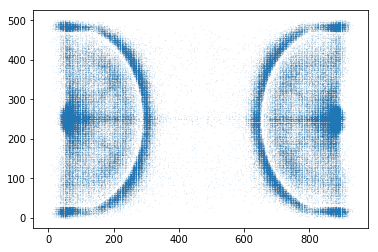

In [5]:
# 畫全場出手點
x= shot['location_x']
y= shot['location_y']
plt.scatter(x,y,s=.005,marker='.')

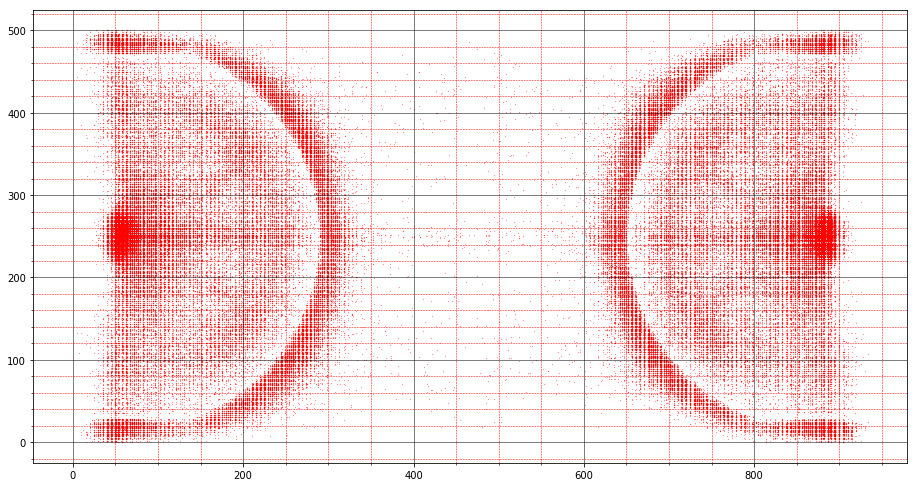

In [6]:
# 比例縮放+增加網格線
# 全場出手點示意圖
plt.figure(figsize=(94/6,50/6)) #寬和高，單位是英尺
plt.scatter(x, y, s=.1, c="r", marker='.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-',linewidth='.5', color='black') #https://www.delftstack.com/zh-tw/howto/matplotlib/how-to-show-pyplot-grid-in-matplotlib/
plt.grid(which='minor', linestyle='--',linewidth='.5', color='r')

(466.5, 933)

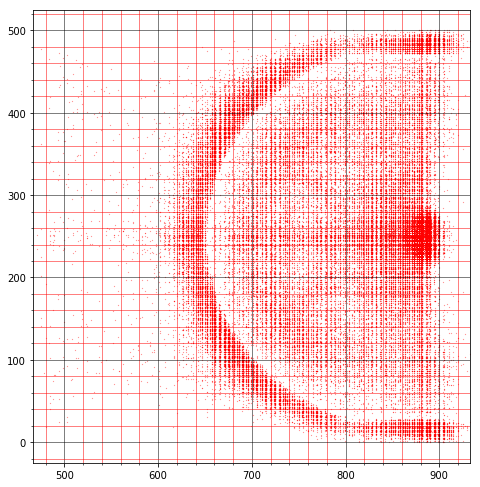

In [7]:
# 半場出手點示意圖
plt.figure(figsize=(94/12,50/6))
plt.scatter(x,y, s=.1,c='r', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linewidth='.5', color='black')
plt.grid(which='minor', linewidth='.5', color='red')
plt.xlim(933/2, 933) #設置x軸的範圍

In [8]:
# 將兩邊半場的投球數合併在一個右半場圖中
shot['halfcourt_x']=np.where(shot['location_x']<933/2, 933-shot['location_x'],shot['location_x'])
shot['halfcourt_y'] =np.where(shot['location_x'] < 933/2, 500 - shot['location_y'],shot['location_y'])
shot.describe()

,location_x,points,location_y,time_from_last_shot,quarter,halfcourt_x,halfcourt_y
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000,209675.000000,209675.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383,799.731480,250.303947
std,345.063654,0.464965,111.02320,19.797357,1.136841,89.606222,111.024160
min,0.000000,2.000000,0.00000,0.000000,1.000000,468.000000,0.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000,720.000000,197.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000,841.000000,250.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000,878.000000,303.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000,933.000000,500.000000


Text(0.5, 1.0, 'Shots')

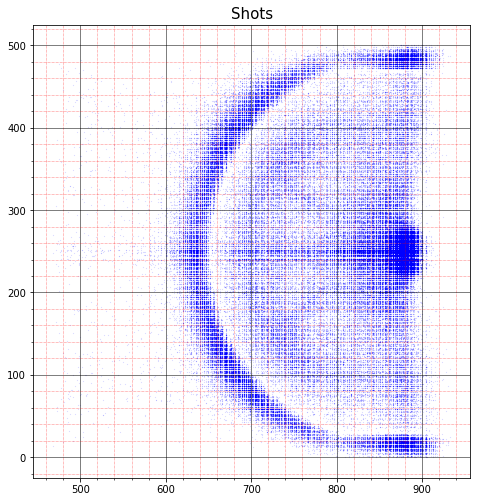

In [9]:
hx= shot['halfcourt_x']
hy= shot['halfcourt_y']
plt.figure(figsize=(94/12,50/6))
plt.scatter(hx,hy, s=.01, c='b', marker='.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("Shots", fontsize = 15)


### 分別看scored、missed、blocked分布圖

Text(0.5, 1.0, 'Scored')

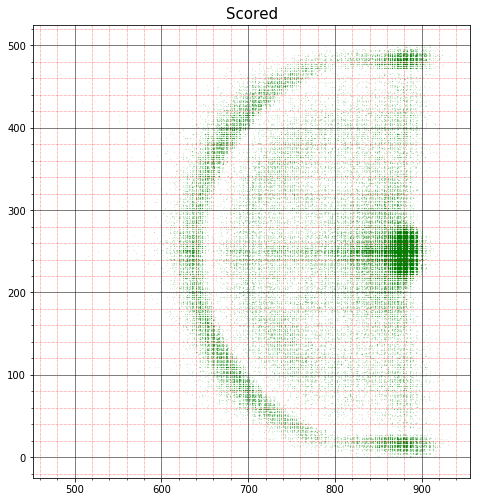

In [10]:
# Scoring shots

Scored = shot[shot.current_shot_outcome == 'SCORED']
hxs = Scored['halfcourt_x']
hys = Scored['halfcourt_y']
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxs,hys, s=.01,c='g', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("Scored", fontsize = 15)

Text(0.5, 1.0, 'Missed')

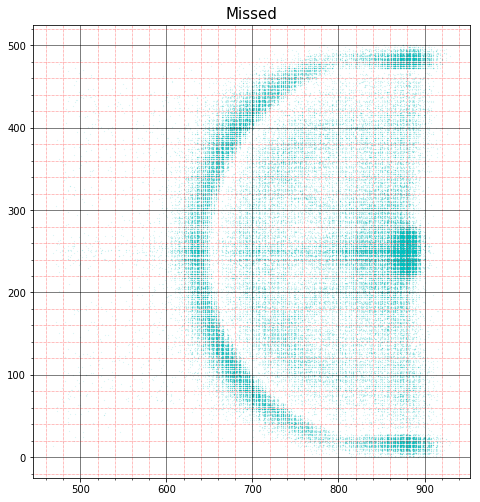

In [11]:
# Missed Shots

Missed = shot[shot.current_shot_outcome == 'MISSED']

hxm = Missed['halfcourt_x']
hym = Missed['halfcourt_y']

plt.figure(figsize=(94/12,50/6))
plt.scatter(hxm,hym, s=.01,c='c', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("Missed", fontsize = 15)

Text(0.5, 1.0, 'Blocked')

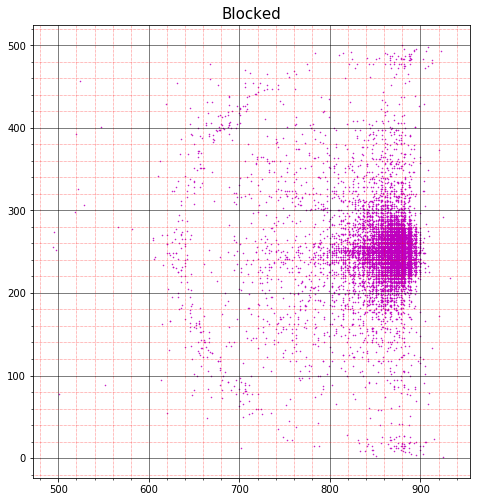

In [12]:
# Blocked shots

Blocked = shot[shot.current_shot_outcome == 'BLOCKED']

hxb = Blocked['halfcourt_x']
hyb = Blocked['halfcourt_y']

plt.figure(figsize=(94/12,50/6))
plt.scatter(hxb,hyb, s=1,c='m', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("Blocked", fontsize = 15)

In [13]:
# 比較NBA球星投球表現
playersn = shot.groupby('shoot_player')['current_shot_outcome'].describe().reset_index()
playersn.sort_values(by = 'count', ascending = False)

,shoot_player,count,unique,top,freq
402,Russell Westbrook,1940,3,MISSED,1026
25,Andrew Wiggins,1568,3,MISSED,760
106,DeMar DeRozan,1545,3,MISSED,731
193,James Harden,1532,3,MISSED,772
28,Anthony Davis,1525,3,SCORED,770
88,Damian Lillard,1489,3,MISSED,728
257,Karl-Anthony Towns,1479,3,SCORED,802
175,Isaiah Thomas,1473,3,SCORED,682
262,Kemba Walker,1451,3,MISSED,695
424,Stephen Curry,1444,3,MISSED,713


In [14]:
playersn1 = shot.groupby(['shoot_player','current_shot_outcome']).describe().reset_index()
playersn1
#playersn.sort_values(by = 'count', ascending = False)

shoot_player current_shot_outcome location_x              \
                                                    count        mean   
0            A.J. Hammons              BLOCKED        5.0  565.400000   
1            A.J. Hammons               MISSED       20.0  401.550000   
2            A.J. Hammons               SCORED       17.0  297.058824   
3            Aaron Brooks              BLOCKED       14.0  477.642857   
4            Aaron Brooks               MISSED      164.0  466.621951   
5            Aaron Brooks               SCORED      121.0  445.157025   
6            Aaron Gordon              BLOCKED       44.0  536.704545   
7            Aaron Gordon               MISSED      427.0  493.646370   
8            Aaron Gordon               SCORED      393.0  494.931298   
9          Aaron Harrison               MISSED        4.0  607.500000   
10          Adreian Payne              BLOCKED        1.0   54.000000   
11          Adreian Payne               MISSED       30.0  342.933333   
12          Adreian Payne               SCORED       23.0  487.826087   
13             Al Horford              BLOCKED       26.0  472.500000   
14             Al Horford               MISSED      396.0  446.285354   
15             Al Horford               SCORED      379.0  465.815303   
16           Al Jefferson              BLOCKED       32.0  516.500000   
17           Al Jefferson               MISSED      204.0  446.549020   
18           Al Jefferson               SCORED      235.0  491.455319   
19        Al-Farouq Aminu              BLOCKED       24.0  625.291667   
20        Al-Farouq Aminu               MISSED      259.0  484.926641   
21        Al-Farouq Aminu               SCORED      183.0  464.846995   
22          Alan Anderson               MISSED       50.0  548.900000   
23          Alan Anderson               SCORED       30.0  428.666667   
24          Alan Williams              BLOCKED       19.0  571.263158   
25          Alan Williams               MISSED      105.0  485.952381   
26          Alan Williams               SCORED      137.0  466.153285   
27             Alec Burks              BLOCKED       21.0  706.857143   
28             Alec Burks               MISSED      128.0  478.859375   
29             Alec Burks               SCORED       99.0  494.212121   
...                   ...                  ...        ...         ...   
1389       Wesley Johnson              BLOCKED        4.0   59.750000   
1390       Wesley Johnson               MISSED      119.0  524.436975   
1391       Wesley Johnson               SCORED       73.0  575.068493   
1392      Wesley Matthews              BLOCKED       24.0  418.000000   
1393      Wesley Matthews               MISSED      490.0  466.426531   
1394      Wesley Matthews               SCORED      333.0  438.534535   
1395          Will Barton              BLOCKED       45.0  473.200000   
1396          Will Barton               MISSED      327.0  478.685015   
1397          Will Barton               SCORED      295.0  466.105085   
1398  Willie Cauley-Stein              BLOCKED       34.0  428.147059   
1399  Willie Cauley-Stein               MISSED      192.0  399.041667   
1400  Willie Cauley-Stein               SCORED      255.0  464.447059   
1401          Willie Reed              BLOCKED       23.0  485.304348   
1402          Willie Reed               MISSED      100.0  492.110000   
1403          Willie Reed               SCORED      162.0  430.913580   
1404      Wilson Chandler              BLOCKED       36.0  420.972222   
1405      Wilson Chandler               MISSED      471.0  446.847134   
1406      Wilson Chandler               SCORED      433.0  463.212471   
1407         Yogi Ferrell              BLOCKED       22.0  402.136364   
1408         Yogi Ferrell               MISSED      212.0  462.051887   
1409         Yogi Ferrell               SCORED      160.0  448.068750   
1410          Zach LaVine              BLOCKED       38.0  439.605263  

Text(0.5, 1.0, 'LeBron James')

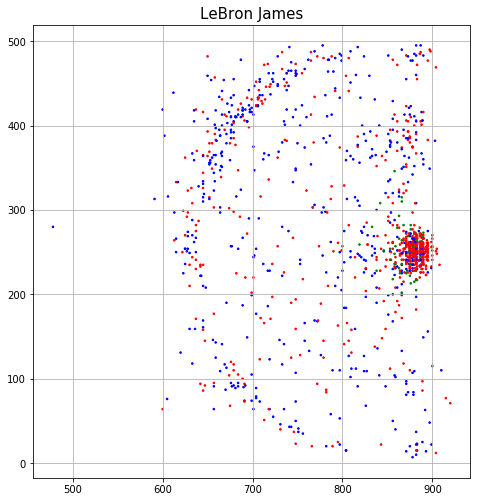

In [45]:
# LeBron 

LeBron = shot[shot['shoot_player']=='LeBron James']
hx_LeBron = LeBron['halfcourt_x']
hy_LeBron = LeBron['halfcourt_y']
colors = np.where(LeBron['current_shot_outcome']=='SCORED','r',np.where(LeBron['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hx_LeBron,hy_LeBron, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("LeBron James", fontsize = 15)

Text(0.5, 1.0, 'Steph Curry')

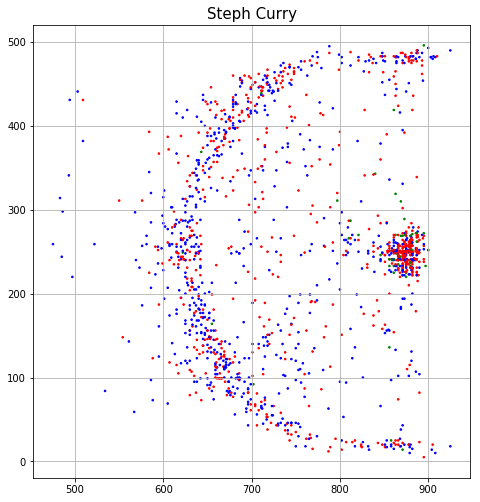

In [51]:
# Steph Curry plot

Curry = shot.loc[shot['shoot_player']=='Stephen Curry',:]
hx_Curry = Curry['halfcourt_x']
hy_Curry = Curry['halfcourt_y']
colors = np.where(Curry['current_shot_outcome']=='SCORED','r',np.where(Curry['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hx_Curry,hy_Curry, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Steph Curry", fontsize = 15)

Text(0.5, 1.0, 'Steph Curry')

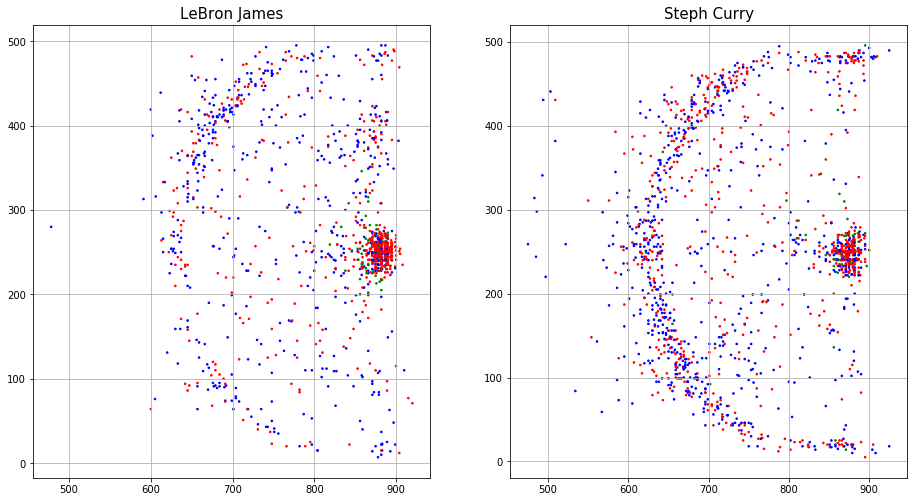

In [53]:
# LeBron James and Steph Curry side by side

f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(LeBron['current_shot_outcome']=='SCORED','r',np.where(LeBron['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hx_LeBron,hy_LeBron, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("LeBron James", fontsize = 15)

ax = f.add_subplot(122)
colors = np.where(Curry['current_shot_outcome']=='SCORED','r',np.where(Curry['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hx_Curry,hy_Curry, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Steph Curry", fontsize = 15)

## Westbrook - Durant Comparision

Text(0.5, 1.0, 'Kevin Durant')

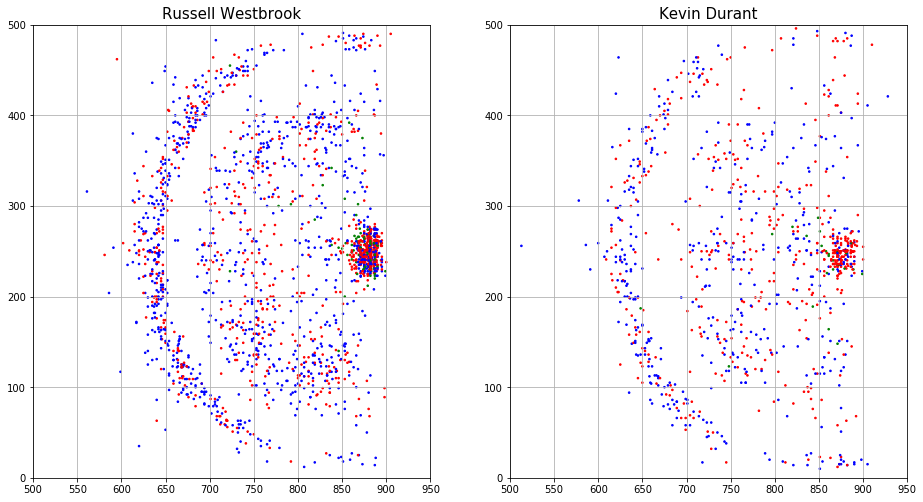

In [18]:
# Westbrook and Durant side by side
f = plt.figure(figsize=(94/6,50/6)) #建立子圖

ax = f.add_subplot(121)
Westbrook = shot.loc[shot['shoot_player']=='Russell Westbrook',:]
hx_West = Westbrook['halfcourt_x']
hy_West = Westbrook['halfcourt_y']
colors = np.where(Westbrook['current_shot_outcome']=='SCORED','r',np.where(Westbrook['current_shot_outcome']=='MISSED','b','g'))
ax=plt.scatter(hx_West,hy_West, s=10, c= colors, marker= '.')
plt.grid(True)
plt.xlim(500,950)
plt.ylim(0,500)
plt.title("Russell Westbrook", fontsize = 15)


ax = f.add_subplot(122)
Durant= shot.loc[shot['shoot_player']=='Kevin Durant',:]
hx_Dur = Durant['halfcourt_x']
hy_Dur = Durant['halfcourt_y']

colors = np.where(Durant['current_shot_outcome']=='SCORED','r',np.where(Durant['current_shot_outcome']=='MISSED','b','g'))
ax=plt.scatter(hx_Dur,hy_Dur, s=10, c= colors, marker= '.')
plt.grid(True)
plt.xlim(500,950)
plt.ylim(0,500)
plt.title("Kevin Durant", fontsize = 15)



## Jordan - Howard Comparision

Text(0.5, 1.0, 'Dwight Howard')

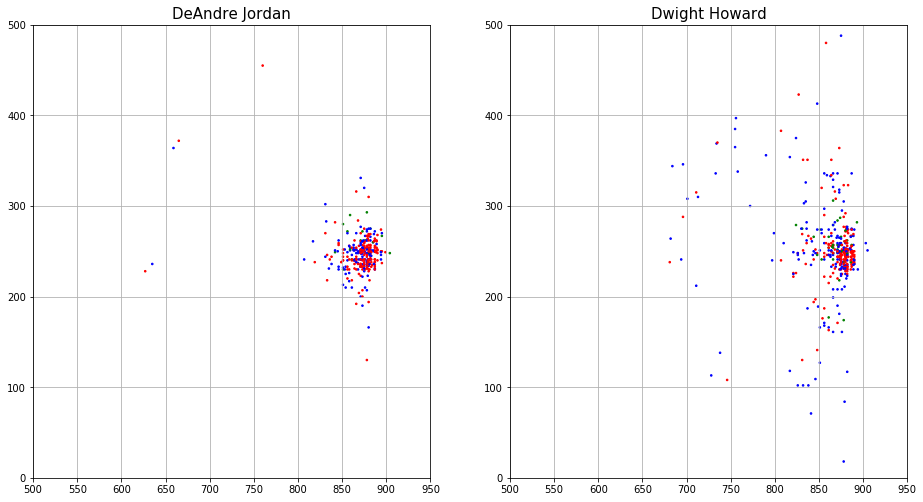

In [19]:
# DeAndre Jordan and Dwight Howard side by side
f = plt.figure(figsize=(94/6,50/6)) #建立子圖

ax = f.add_subplot(121)
Jordan = shot.loc[shot['shoot_player']=='DeAndre Jordan',:]
hx_Jordan = Jordan['halfcourt_x']
hy_Jordan = Jordan['halfcourt_y']
colors = np.where(Jordan['current_shot_outcome']=='SCORED','r',np.where(Jordan['current_shot_outcome']=='MISSED','b','g'))
ax=plt.scatter(hx_Jordan,hy_Jordan, s=10, c= colors, marker= '.')
plt.grid(True)
plt.xlim(500,950)
plt.ylim(0,500)
plt.title("DeAndre Jordan", fontsize = 15)


ax = f.add_subplot(122)
Howard= shot.loc[shot['shoot_player']=='Dwight Howard',:]
hx_Howard = Howard['halfcourt_x']
hy_Howard = Howard['halfcourt_y']

colors = np.where(Howard['current_shot_outcome']=='SCORED','r',np.where(Howard['current_shot_outcome']=='MISSED','b','g'))
ax=plt.scatter(hx_Howard,hy_Howard, s=10, c= colors, marker= '.')
plt.grid(True)
plt.xlim(500,950)
plt.ylim(0,500)
plt.title("Dwight Howard", fontsize = 15)





## Lopez - Lopez Comparision

Text(0.5, 1.0, 'Robin Lopez')

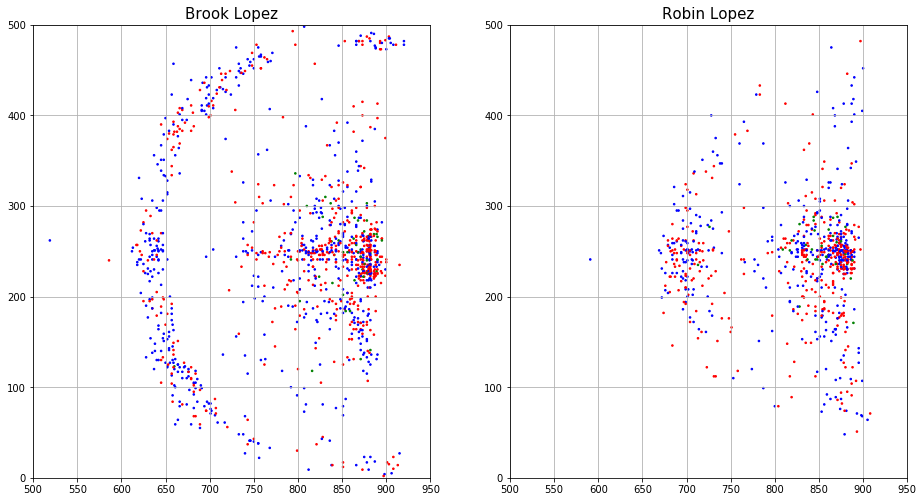

In [21]:
# Brook Lopez and Robin Lopez side by side
f = plt.figure(figsize=(94/6,50/6)) #建立子圖

ax = f.add_subplot(121)
Brook = shot.loc[shot['shoot_player']=='Brook Lopez',:]
hx_Brook = Brook['halfcourt_x']
hy_Brook = Brook['halfcourt_y']
colors = np.where(Brook['current_shot_outcome']=='SCORED','r',np.where(Brook['current_shot_outcome']=='MISSED','b','g'))
ax=plt.scatter(hx_Brook,hy_Brook, s=10, c= colors, marker= '.')
plt.grid(True)
plt.xlim(500,950)
plt.ylim(0,500)
plt.title("Brook Lopez", fontsize = 15)


ax = f.add_subplot(122)
Robin= shot.loc[shot['shoot_player']=='Robin Lopez',:]
hx_Robin = Robin['halfcourt_x']
hy_Robin = Robin['halfcourt_y']

colors = np.where(Robin['current_shot_outcome']=='SCORED','r',np.where(Robin['current_shot_outcome']=='MISSED','b','g'))
ax=plt.scatter(hx_Robin,hy_Robin, s=10, c= colors, marker= '.')
plt.grid(True)
plt.xlim(500,950)
plt.ylim(0,500)
plt.title("Robin Lopez", fontsize = 15)